# Duże zadanie zaliczeniowe
## Wprowadzenie
Baza danych DrugBank to ogólnodostępna i bezpłatna baza informacji o lekach
(substancjach leczniczych). Została utworzona w 2006 roku przez zespół Craiga Knoxa i
Davida Wisharta z Wydziału Informatyki i Nauk Biologicznych Uniwersytetu Alberty w
Kanadzie. Łączy dane z dziedziny chemii, biochemii, genetyki, farmakologii i
farmakokinetyki. Poniższy projekt polega na przeanalizowaniu części bazy danych i opracowaniu wykresów i diagramów ją opisujących.

# Zadanie 1
Uworzymy ramkę danych, która dla każdego leku będzie zawierać takie informacje jak
jego unikalny identyfikator w bazie DrugBank, nazwę leku, jego typ, opis, postać w jakiej lek występuje,
wskazania, mechanizm działania oraz informację z jakimi pokarmami dany lek wchodzi w interakcję.

In [4]:
import xmltodict
import pandas as pd
from IPython.display import display

def task_1(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']  # Access the first element of the list
        name = drug['name']
        drug_type = drug['@type']
        description = drug.get('description', '')
        state = drug.get('state', '')
        indication = drug.get('indication', '')
        mechanism = drug.get('mechanism-of-action', '')
        food_interactions = drug.get('food-interactions', '')

        # If food_interactions is a dictionary, extract all text values
        if isinstance(food_interactions, dict):
            food_interactions = ', '.join([', '.join(v) if isinstance(v, list) else v for k, v in food_interactions.items()])

        data.append({
            'DrugBank ID': drug_id,
            'Drug Name': name,
            'Type': drug_type,
            'Description': description,
            'State': state,
            'Indication': indication,
            'Mechanism of Action': mechanism,
            'Food Interactions': food_interactions
        })

    # Create DataFrame
    df = pd.DataFrame(data)
    return df

# Invoke the function with 'drugbank_partial.xml'
task_1('drugbank_partial.xml')

,DrugBank ID,Drug Name,Type,Description,State,Indication,Mechanism of Action,Food Interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,None
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,None
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,None
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,None
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,solid,Octreotide by injection is used for the treatm...,Octreotide binds to somatostatin receptors cou...,Take on an empty stomach. The oral capsules sh...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,liquid,"For the treatment of hairy cell leukemia, mali...",Interferon alpha binds to type I interferon re...,Avoid alcohol.
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,solid,For palliative treatment of advanced prostate ...,Abarelix binds to the gonadotropin releasing h...,None
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,liquid,Administration of exogenous oxytocin is indica...,Oxytocin plays a vital role in labour and deli...,None


# Zadanie 2
Tworzymy ramkę danych, która pozwala na wyszukanie w bazie informacji o wszystkich synonimach pod jakimi lek występuje.
Piszemy również funkcję, która dla podanego DrugBank ID utworzy i wyrysuje graf wszystkich synonimów.


,DrugBank ID,Synonyms
0,DB00001,"[Leu1, Thr2]-63-desulfohirudin, Desulfatohirud..."
1,DB00002,"Cetuximab, Cétuximab, Cetuximabum"
2,DB00003,Deoxyribonuclease (human clone 18-1 protein mo...
3,DB00004,"Denileukin, Denileukin diftitox, Interleukin-2..."
4,DB00005,"Etanercept, etanercept-szzs, etanercept-ykro, ..."
...,...,...
95,DB00104,"Octreotida, Octreotide, Octreotidum, Octrotide"
96,DB00105,"Interferon alfa-2b, Interferon alfa-2b (recomb..."
97,DB00106,Abarelix
98,DB00107,"Oxitocina, Oxytocin"


Enter DrugBank ID (default is 'DB00001'):  


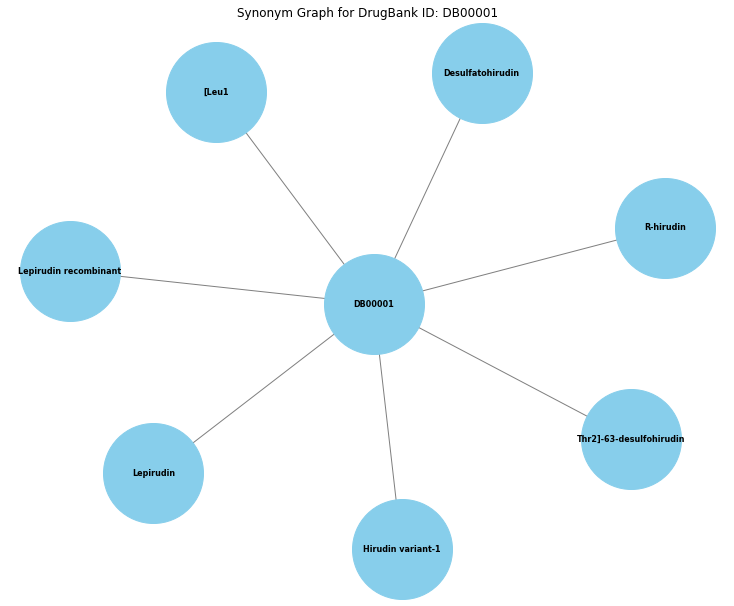

In [9]:
import xmltodict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

def task_2(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data including synonyms
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']

        # Extract synonyms
        synonyms = []
        if 'synonyms' in drug and drug['synonyms'] is not None:
            if isinstance(drug['synonyms']['synonym'], list):
                synonyms = [syn['#text'] for syn in drug['synonyms']['synonym']]
            else:
                synonyms = [drug['synonyms']['synonym']['#text']]

        data.append({
            'DrugBank ID': drug_id,
            'Synonyms': ', '.join(synonyms)
        })

    # Create DataFrame
    df_synonyms = pd.DataFrame(data)

    # Function to create and plot synonym graph
    def plot_synonym_graph(drug_id='DB00001'):
        # Find the row with the given DrugBank ID
        row = df_synonyms[df_synonyms['DrugBank ID'] == drug_id]
        if row.empty:
            print(f"No synonyms found for DrugBank ID: {drug_id}")
            return

        synonyms = row['Synonyms'].values[0].split(', ')

        # Create a graph
        G = nx.Graph()

        # Add nodes and edges
        G.add_node(drug_id)
        for synonym in synonyms:
            G.add_node(synonym)
            G.add_edge(drug_id, synonym)

        # Draw the graph
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=10000, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray')
        plt.title(f"Synonym Graph for DrugBank ID: {drug_id}")
        plt.show()

    # Get user input
    user_input = input("Enter DrugBank ID (default is 'DB00001'): ") or 'DB00001'
    plot_synonym_graph(user_input)
    return df_synonyms

# Invoke the function with 'drugbank_partial.xml'
task_2('drugbank_partial.xml')

# Zadanie 3
Tworzymy ramkę danych o produktach farmaceutycznych zawierająch dany lek (substancję leczniczą).
Ramka zawiera informację o ID leku, nazwie produktu, producencie, kod w narodowym rejestrze USA,
postać w jakiej produkt występuje, sposób aplikacji, informacje o dawce, kraju i agencji rejestrującej produkt.

In [5]:
import xmltodict
import pandas as pd
from IPython.display import display

def task_3(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about pharmaceutical products
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']

        if 'products' in drug and drug['products'] is not None:
            for product in drug['products']['product']:
                if isinstance(product, dict):
                    product_name = product.get('name', '')
                    labeller = product.get('labeller', '')
                    national_drug_code = product.get('ndc-product-code', '')
                    dosage_form = product.get('dosage-form', '')
                    route = product.get('route', '')
                    strength = product.get('strength', '')
                    country = product.get('country', '')
                    regulatory_agency = product.get('source', '')

                    data.append({
                        'DrugBank ID': drug_id,
                        'Product Name': product_name,
                        'Manufacturer': labeller,
                        'National Drug Code': national_drug_code,
                        'Dosage Form': dosage_form,
                        'Route': route,
                        'Strength': strength,
                        'Country': country,
                        'Regulatory Agency': regulatory_agency
                    })

    # Create DataFrame
    df_products = pd.DataFrame(data)
    return df_products

# Invoke the function with 'drugbank_partial.xml'
task_3('drugbank_partial.xml')

,DrugBank ID,Product Name,Manufacturer,National Drug Code,Dosage Form,Route,Strength,Country,Regulatory Agency
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
4572,DB00108,Tysabri,Elan Pharmaceuticals,59075-730,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4573,DB00108,Tysabri,Biogen Inc.,64406-008,Injection,Intravenous,300 mg/15mL,US,FDA NDC
4574,DB00108,Tysabri,Biogen,None,Solution,Intravenous,300 mg / 15 mL,Canada,DPD
4575,DB00108,Tysabri,Biogen Netherlands B.V.,None,"Injection, solution, concentrate",Intravenous,300 mg,EU,EMA


# Zadanie 4
Tworzymy ramkę danych zawierającą informację o wszystkich szlakach z jakimi jakikolwiek lek wchodzi w interakcję oraz podajemy całkowitą liczbę tych szlaków.

In [11]:
import xmltodict
import pandas as pd
from IPython.display import display

def task_4(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about pathways
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']
        if 'pathways' in drug and drug['pathways'] is not None:
            pathways = drug['pathways']['pathway']
            if not isinstance(pathways, list):
                pathways = [pathways]
            for pathway in pathways:
                if isinstance(pathway, dict):
                    pathway_name = pathway.get('name', '')

                    data.append({
                        'DrugBank ID': drug_id,
                        'Pathway Name': pathway_name,
                    })

    # Create DataFrame
    df_pathways = pd.DataFrame(data)
    # Display
    display(df_pathways)

    # Total number of all pathways (including duplicates)
    total_pathways = len(df_pathways)
    print(f"Total number of all pathways: {total_pathways}")

# Invoke the function with 'drugbank_partial.xml'
task_4('drugbank_partial.xml')

,DrugBank ID,Pathway Name
0,DB00001,Lepirudin Action Pathway
1,DB00002,Cetuximab Action Pathway
2,DB00006,Bivalirudin Action Pathway
3,DB00009,Alteplase Action Pathway
4,DB00013,Urokinase Action Pathway
5,DB00015,Reteplase Action Pathway
6,DB00029,Anistreplase Action Pathway
7,DB00031,Tenecteplase Action Pathway
8,DB00054,Abciximab Action Pathway
9,DB00063,Eptifibatide Action Pathway


Total number of all pathways: 12


# Zadanie 5
Dla każdego szlaku w bazie danych przedstawiamy w formie ramki danych oraz grafu leki, które wchodzą z nim w interakcje.

,Pathway Name,DrugBank ID
0,Abciximab Action Pathway,DB00054
1,Alteplase Action Pathway,DB00009
2,Anistreplase Action Pathway,DB00029
3,Bivalirudin Action Pathway,DB00006
4,Cetuximab Action Pathway,DB00002
5,Eptifibatide Action Pathway,DB00063
6,Lepirudin Action Pathway,DB00001
7,Reteplase Action Pathway,DB00015
8,Streptokinase Action Pathway,DB00086
9,Tenecteplase Action Pathway,DB00031


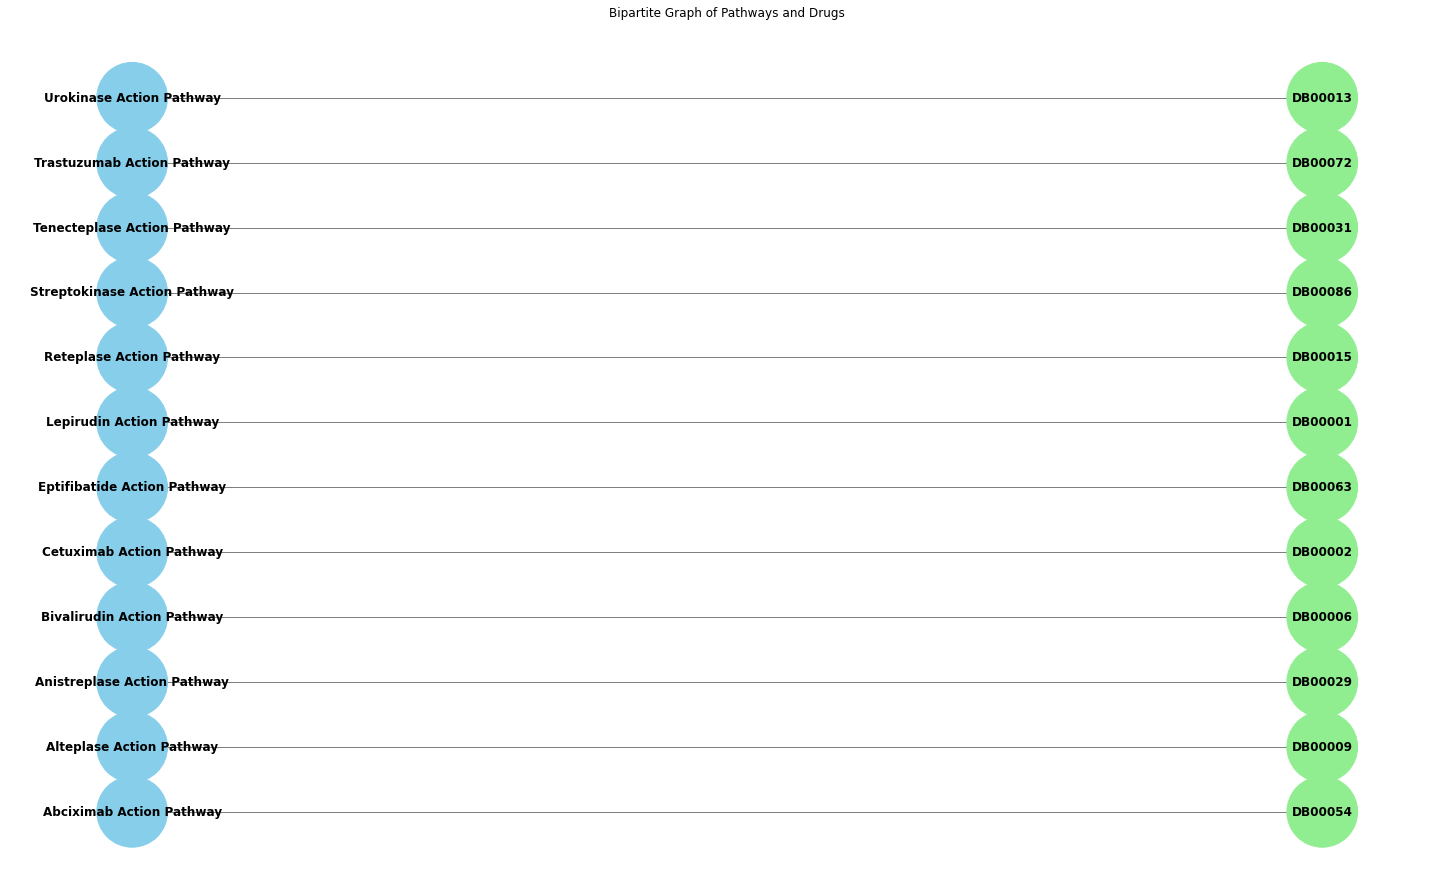

In [12]:
import xmltodict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

def task_5(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about pathways and drugs
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']
        if 'pathways' in drug and drug['pathways'] is not None:
            pathways = drug['pathways']['pathway']
            if not isinstance(pathways, list):
                pathways = [pathways]
            for pathway in pathways:
                if isinstance(pathway, dict):
                    pathway_name = pathway.get('name', '')

                    data.append({
                        'Pathway Name': pathway_name,
                        'DrugBank ID': drug_id,
                    })

    # Create DataFrame
    df_pathways_drugs = pd.DataFrame(data)

    # Group by pathway and aggregate drugs into a list
    df_grouped = df_pathways_drugs.groupby('Pathway Name')['DrugBank ID'].apply(lambda x: ', '.join(x)).reset_index()

    # Display DataFrame
    display(df_grouped)

    # Function to create and plot bipartite graph
    def plot_bipartite_graph(df):
        B = nx.Graph()

        # Add nodes with the bipartite attribute
        pathways = df['Pathway Name'].unique()
        drugs = df['DrugBank ID'].str.split(', ').explode().unique()

        B.add_nodes_from(pathways, bipartite=0)
        B.add_nodes_from(drugs, bipartite=1)

        # Add edges
        for _, row in df.iterrows():
            for drug in row['DrugBank ID'].split(', '):
                B.add_edge(row['Pathway Name'], drug)

        # Draw the bipartite graph
        pos = nx.bipartite_layout(B, pathways, scale=2)
        plt.figure(figsize=(20, 12))
        nx.draw(B, pos, with_labels=True, node_size=5000, node_color=['skyblue' if node in pathways else 'lightgreen' for node in B.nodes()], font_size=12, font_weight='bold', edge_color='gray')
        plt.title("Bipartite Graph of Pathways and Drugs")
        plt.show()

    # Plot the bipartite graph
    plot_bipartite_graph(df_grouped)

# Invoke the function with 'drugbank_partial.xml'
task_5('drugbank_partial.xml')

# Zadanie 6
Dla każdego leku w bazie prezentujemy histogram zawierający ilość szlaków, z którymi dany lek wchodzi w interakcje.


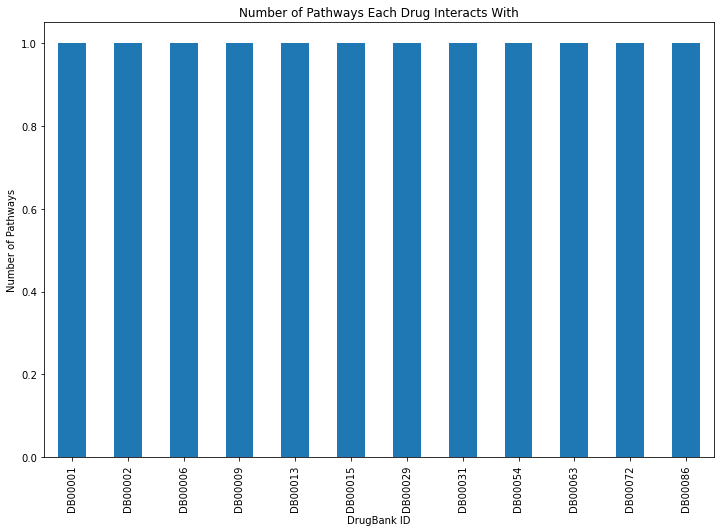

In [13]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

def task_6(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about pathways and drugs
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']
        if 'pathways' in drug and drug['pathways'] is not None:
            pathways = drug['pathways']['pathway']
            if not isinstance(pathways, list):
                pathways = [pathways]
            for pathway in pathways:
                if isinstance(pathway, dict):
                    pathway_name = pathway.get('name', '')

                    data.append({
                        'Pathway Name': pathway_name,
                        'DrugBank ID': drug_id,
                    })

    # Create DataFrame
    df_pathways_drugs = pd.DataFrame(data)

    # Count the number of pathways each drug interacts with
    pathway_counts = df_pathways_drugs['DrugBank ID'].value_counts()

    # Plot the histogram
    plt.figure(figsize=(12, 8))
    pathway_counts.plot(kind='bar')
    plt.xlabel('DrugBank ID')
    plt.ylabel('Number of Pathways')
    plt.title('Number of Pathways Each Drug Interacts With')
    plt.xticks(rotation=90)
    plt.show()

# Invoke the function with 'drugbank_partial.xml'
task_6('drugbank_partial.xml')

# Zadanie 7
Tworzymy ramkę danych zawierającą informacje o białkach, z którymi poszczególne leki
wchodzą w interakcje. Białka te to tzw. targety. Ramka danych  zawiera
DrugBank ID targetu, informację o zewnętrznej bazie danych (ang. *source*,
np. Swiss-Prot), identyfikator w zewnętrznej bazie danych, nazwę polipeptydu, nazwę genu
kodującego polipeptyd, identyfikator genu GenAtlas ID, numer chromosomu, umiejscowienie
w komórce.

In [14]:
import xmltodict
import pandas as pd
from IPython.display import display

def task_7(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about targets
    data = []
    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']
        if 'targets' in drug and drug['targets'] is not None:
            targets = drug['targets']['target']
            if not isinstance(targets, list):
                targets = [targets]
            for target in targets:
                if isinstance(target, dict):
                    target_id = target.get('id', '')

                    polypeptides = target.get('polypeptide', [])
                    if not isinstance(polypeptides, list):
                        polypeptides = [polypeptides]

                    for polypeptide in polypeptides:
                        polypeptide_name = polypeptide.get('name', '')
                        gene_name = polypeptide.get('gene-name', '')
                        chromosome = polypeptide.get('chromosome-location', '')
                        cellular_location = polypeptide.get('cellular-location', '')
                        external_source = polypeptide.get('@source', '')
                        external_id = polypeptide.get('@id', '')

                        # Extract GenAtlas ID
                        genatlas_id = ''
                        external_identifiers = polypeptide.get('external-identifiers', {}).get('external-identifier', [])
                        if not isinstance(external_identifiers, list):
                            external_identifiers = [external_identifiers]
                        for identifier in external_identifiers:
                            if identifier.get('resource') == 'GenAtlas':
                                genatlas_id = identifier.get('identifier', '')
                                break

                        data.append({
                            'DrugBank ID': drug_id,
                            'Target ID': target_id,
                            'Source': external_source,
                            'External ID': external_id,
                            'Polypeptide Name': polypeptide_name,
                            'Gene Name': gene_name,
                            'GenAtlas ID': genatlas_id,
                            'Chromosome': chromosome,
                            'Cellular Location': cellular_location
                        })

    # Create DataFrame
    df_targets = pd.DataFrame(data)
    # Display DataFrame
    display(df_targets)

# Invoke the function with 'drugbank_partial.xml'
task_7('drugbank_partial.xml')

,DrugBank ID,Target ID,Source,External ID,Polypeptide Name,Gene Name,GenAtlas ID,Chromosome,Cellular Location
0,DB00001,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,DB00002,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,DB00002,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,DB00002,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,DB00002,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...,...
247,DB00107,BE0000844,Swiss-Prot,P30559,Oxytocin receptor,OXTR,OXTR,3,Cell membrane
248,DB00108,BE0000590,Swiss-Prot,P13612,Integrin alpha-4,ITGA4,ITGA4,2,Membrane
249,DB00108,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
250,DB00108,BE0000710,Swiss-Prot,P12314,High affinity immunoglobulin gamma Fc receptor I,FCGR1A,FCGR1A,1,Cell membrane


# Zadanie 8
Tworzymy wykres kołowy prezentujący procentowe występowanie targetów w różnych
częściach komórki.

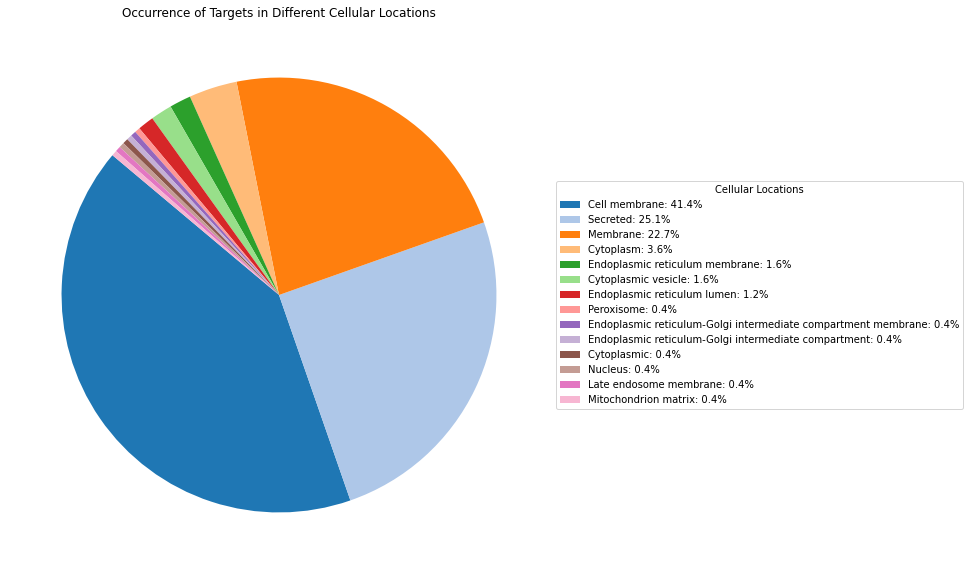

In [15]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

def task_8(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract cellular location data
    cellular_locations = []
    for drug in data_dict['drugbank']['drug']:
        if 'targets' in drug and drug['targets'] is not None:
            targets = drug['targets']['target']
            if not isinstance(targets, list):
                targets = [targets]
            for target in targets:
                polypeptides = target.get('polypeptide', [])
                if not isinstance(polypeptides, list):
                    polypeptides = [polypeptides]
                for polypeptide in polypeptides:
                    cellular_location = polypeptide.get('cellular-location', '')
                    if cellular_location:
                        cellular_locations.append(cellular_location)

    # Create a DataFrame
    df_cellular_locations = pd.DataFrame(cellular_locations, columns=['Cellular Location'])

    # Count the occurrences of each cellular location
    cellular_location_counts = df_cellular_locations['Cellular Location'].value_counts()

    # Calculate percentages
    total_count = cellular_location_counts.sum()
    percentages = (cellular_location_counts / total_count) * 100

    # Plot the pie chart
    plt.figure(figsize=(12, 10))
    colors = plt.cm.tab20(range(len(cellular_location_counts)))
    wedges, texts = plt.pie(cellular_location_counts, autopct=None, startangle=140, colors=colors)

    # Add a legend with percentages
    plt.legend(wedges, [f'{label}: {pct:.1f}%' for label, pct in zip(cellular_location_counts.index, percentages)], title="Cellular Locations", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Occurrence of Targets in Different Cellular Locations')
    plt.show()

# Invoke the function with 'drugbank_partial.xml'
task_8('drugbank_partial.xml')

# Zadanie 9
Tworzymy ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile
jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w
leczeniu zwierząt, a następnie przedstawiamy te dane na wykresie kołowym. Dodatkowo podajemy liczbę leków, które zostały zatwierdzone, ale nie wycofane.

,Status,Count
0,approved,98
1,withdrawn,10
2,experimental/investigational,57
3,vet_approved,4


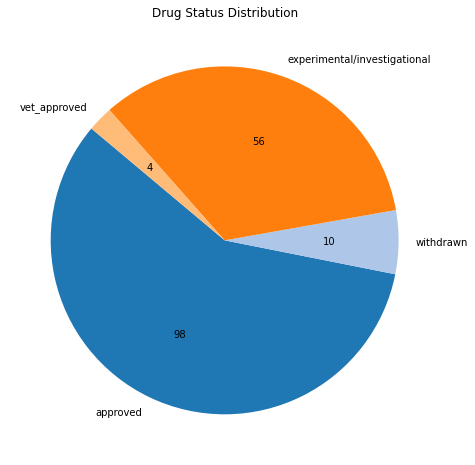

Number of approved drugs that are not withdrawn: 89


In [16]:
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

def task_9(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data
    data = {'approved': 0, 'withdrawn': 0, 'experimental/investigational': 0, 'vet_approved': 0}
    approved_not_withdrawn = 0

    for drug in data_dict['drugbank']['drug']:
        groups = drug.get('groups', {}).get('group', [])
        if isinstance(groups, str):
            groups = [groups]
        for group in groups:
            group_lower = group.lower().replace('-', '_')
            if group_lower in ['experimental', 'investigational']:
                data['experimental/investigational'] += 1
            elif group_lower in data:
                data[group_lower] += 1
                if group_lower == 'approved':
                    withdrawn = any(g.lower() == 'withdrawn' for g in groups)
                    if not withdrawn:
                        approved_not_withdrawn += 1

    # Create DataFrame
    df = pd.DataFrame(list(data.items()), columns=['Status', 'Count'])

    # Display DataFrame
    display(df)

    # Plot the pie chart
    plt.figure(figsize=(10, 8))
    colors = plt.cm.tab20(range(len(df)))
    plt.pie(df['Count'], labels=df['Status'], autopct=lambda p: f'{int(p * sum(df["Count"]) / 100)}', startangle=140, colors=colors)
    plt.title('Drug Status Distribution')
    plt.show()

    # Print the number of approved drugs that are not withdrawn
    print(f"Number of approved drugs that are not withdrawn: {approved_not_withdrawn}")

# Invoke the function with 'drugbank_partial.xml'
task_9('drugbank_partial.xml')

# Zadanie 10
Tworzymy ramkę danych opisującą w jaki sposób dany lek może wchodzić w interakcje z innymi.

In [17]:
import xmltodict
import pandas as pd
from IPython.display import display

def task_10(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Function to create DataFrame for drug interactions based on user input
    def get_drug_interactions(drug_id='DB00001'):
        data = []
        for drug in data_dict['drugbank']['drug']:
            current_drug_id = drug['drugbank-id'][0]['#text']
            if current_drug_id == drug_id:
                if 'drug-interactions' in drug and drug['drug-interactions'] is not None:
                    interactions = drug['drug-interactions']['drug-interaction']
                    if not isinstance(interactions, list):
                        interactions = [interactions]
                    for interaction in interactions:
                        if isinstance(interaction, dict):
                            interacting_drug_id = interaction.get('drugbank-id', '')
                            description = interaction.get('description', '')

                            data.append({
                                'DrugBank ID': current_drug_id,
                                'Interacting Drug ID': interacting_drug_id,
                                'Description': description
                            })
                break

        # Create DataFrame
        df_interactions = pd.DataFrame(data)
        # Display DataFrame
        display(df_interactions)

    # Get user input
    user_input = input("Enter DrugBank ID (default is 'DB00001'): ") or 'DB00001'
    get_drug_interactions(user_input)

# Invoke the function with 'drugbank_partial.xml'
task_10('drugbank_partial.xml')

Enter DrugBank ID (default is 'DB00001'):  


,DrugBank ID,Interacting Drug ID,Description
0,DB00001,DB06605,Apixaban may increase the anticoagulant activi...
1,DB00001,DB06695,Dabigatran etexilate may increase the anticoag...
2,DB00001,DB01254,The risk or severity of bleeding and hemorrhag...
3,DB00001,DB01609,The risk or severity of gastrointestinal bleed...
4,DB00001,DB01586,The risk or severity of bleeding and bruising ...
...,...,...,...
647,DB00001,DB09422,The therapeutic efficacy of Lepirudin can be d...
648,DB00001,DB09567,The therapeutic efficacy of Lepirudin can be d...
649,DB00001,DB15434,The risk or severity of bleeding can be increa...
650,DB00001,DB17472,The risk or severity of bleeding can be increa...


# Zadanie 11
Prezentujemy w formie grafu dla podanego genu substancje lecznice, które wchodzą z nim w interakcje oraz produkty farmaceutyczne, które je zawierają.


Enter Gene Name (default is 'F2'):  


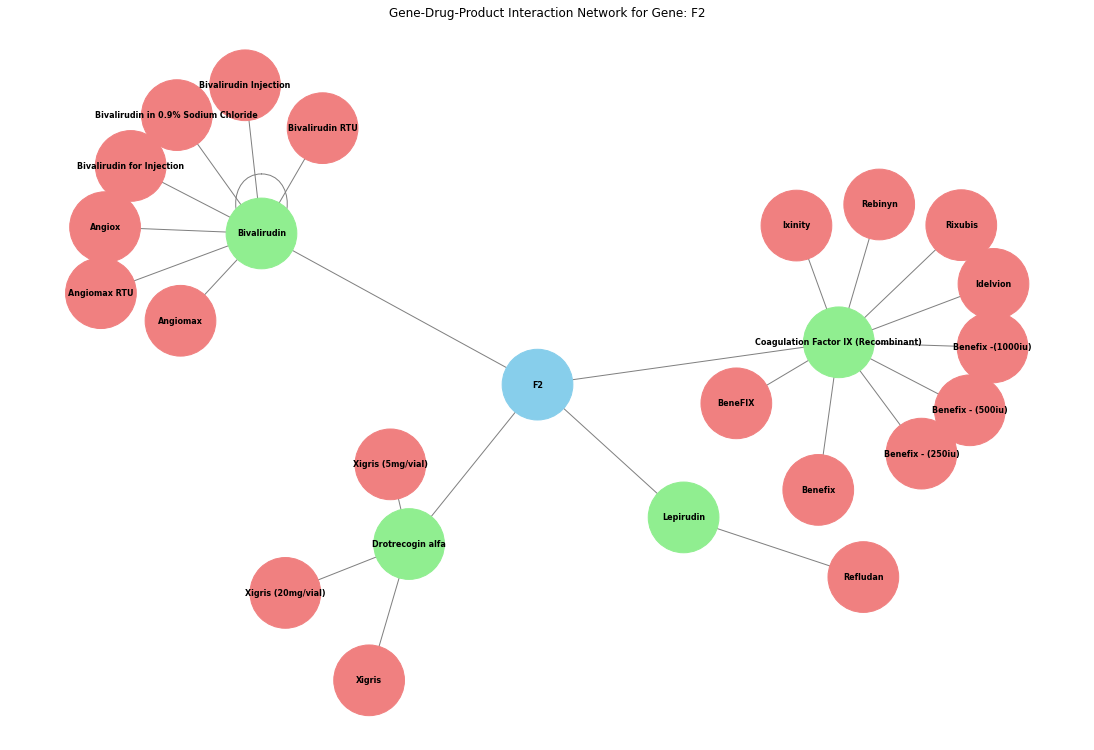

In [18]:
import xmltodict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

def task_11(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract data about genes, drugs, and products
    genes_data = []
    drugs_data = []
    products_data = []

    for drug in data_dict['drugbank']['drug']:
        drug_id = drug['drugbank-id'][0]['#text']
        drug_name = drug['name']

        # Extract gene information
        if 'targets' in drug and drug['targets'] is not None:
            targets = drug['targets']['target']
            if not isinstance(targets, list):
                targets = [targets]
            for target in targets:
                if isinstance(target, dict):
                    polypeptides = target.get('polypeptide', [])
                    if not isinstance(polypeptides, list):
                        polypeptides = [polypeptides]
                    for polypeptide in polypeptides:
                        gene_name = polypeptide.get('gene-name', '')
                        genes_data.append({
                            'DrugBank ID': drug_id,
                            'Drug Name': drug_name,
                            'Gene Name': gene_name
                        })

        # Extract product information
        if 'products' in drug and drug['products'] is not None:
            for product in drug['products']['product']:
                if isinstance(product, dict):
                    product_name = product.get('name', '')
                    products_data.append({
                        'DrugBank ID': drug_id,
                        'Drug Name': drug_name,
                        'Product Name': product_name
                    })

    # Create DataFrames
    df_genes = pd.DataFrame(genes_data)
    df_products = pd.DataFrame(products_data)

    # Function to create and plot the graph
    def plot_gene_drug_product_graph(gene_name='F2'):
        # Filter data for the given gene_name
        df_gene_filtered = df_genes[df_genes['Gene Name'] == gene_name]
        if df_gene_filtered.empty:
            print(f"No data found for gene: {gene_name}")
            return

        # Create a graph
        G = nx.Graph()

        # Add nodes and edges for genes and drugs
        for _, row in df_gene_filtered.iterrows():
            G.add_node(row['Gene Name'], type='gene')
            G.add_node(row['Drug Name'], type='drug')
            G.add_edge(row['Gene Name'], row['Drug Name'])

        # Add nodes and edges for drugs and products
        for _, row in df_products.iterrows():
            if row['DrugBank ID'] in df_gene_filtered['DrugBank ID'].values:
                G.add_node(row['Product Name'], type='product')
                G.add_node(row['Drug Name'], type='drug')
                G.add_edge(row['Drug Name'], row['Product Name'])

        # Use planar layout as initial positions for spring layout
        pos_planar = nx.planar_layout(G)
        pos_spring = nx.spring_layout(G, pos=pos_planar, k=1.0)

        # Draw the graph using the combined layout
        plt.figure(figsize=(15, 10))
        node_colors = ['skyblue' if G.nodes[node]['type'] == 'gene' else 'lightgreen' if G.nodes[node]['type'] == 'drug' else 'lightcoral' for node in G.nodes()]
        nx.draw(G, pos_spring, with_labels=True, node_size=5000, node_color=node_colors, font_size=8, font_weight='bold', edge_color='gray')
        plt.title(f"Gene-Drug-Product Interaction Network for Gene: {gene_name}")
        plt.show()

    # Get user input
    user_input = input("Enter Gene Name (default is 'F2'): ") or 'F2'
    plot_gene_drug_product_graph(user_input)

# Invoke the function with 'drugbank_partial.xml'
task_11('drugbank_partial.xml')

# Zadanie 12
Dla każdego genu z naszej bazy pobieramy dodatkowe informacje takie jak jego długość, czy nazwę organizmu, w którym występuje.
Informacje te uzyskujemy ze strony United Protein Resource (UniProt) korzystając z ich API.


In [19]:
import xmltodict
import pandas as pd
import requests
import io
from IPython.display import display

def task_12(xml_file):
    # Parse the XML file
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract unique gene names
    gene_names = set()
    for drug in data_dict['drugbank']['drug']:
        if 'targets' in drug and drug['targets'] is not None:
            targets = drug['targets']['target']
            if not isinstance(targets, list):
                targets = [targets]
            for target in targets:
                polypeptides = target.get('polypeptide', [])
                if not isinstance(polypeptides, list):
                    polypeptides = [polypeptides]
                for polypeptide in polypeptides:
                    gene_name = polypeptide.get('gene-name', '')
                    if gene_name:
                        gene_names.add(gene_name)

    # Function to fetch data from UniProt
    def fetch_uniprot_data(gene_name):
        url = f"https://rest.uniprot.org/uniprotkb/search?query=gene:{gene_name}&format=tsv&fields=gene_names,organism_name,length"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.text
            return data
        else:
            print(f"Failed to fetch data for gene: {gene_name}")
            return None

    # Fetch data for each gene and store in a list
    uniprot_data_list = []
    for gene_name in gene_names:
        uniprot_data = fetch_uniprot_data(gene_name)
        if uniprot_data:
            uniprot_data_list.append(uniprot_data)

    # Combine all data into a single DataFrame
    uniprot_data_combined = "\n".join(uniprot_data_list)
    df_uniprot = pd.read_csv(io.StringIO(uniprot_data_combined), sep='\t')

    # Filter the DataFrame to include only the relevant gene names
    df_uniprot_filtered = df_uniprot[df_uniprot['Gene Names'].apply(lambda x: any(gene in x.split() for gene in gene_names))]

    # Reset the index of the DataFrame
    df_uniprot_filtered.reset_index(drop=True, inplace=True)

    # Display the filtered DataFrame
    display(df_uniprot_filtered)

# Invoke the function with 'drugbank_partial.xml'
task_12('drugbank_partial.xml')

,Gene Names,Organism,Length
0,MCFD2 SDNSF,Homo sapiens (Human),146
1,MCFD2,Pongo abelii (Sumatran orangutan) (Pongo pygma...,146
2,MCFD2,Homo sapiens (Human),109
3,MCFD2,Homo sapiens (Human),90
4,MCFD2,Homo sapiens (Human),61
...,...,...,...
2555,CALR,Anolis carolinensis (Green anole) (American ch...,421
2556,CALR,Nomascus leucogenys (Northern white-cheeked gi...,417
2557,CALR,Cavia porcellus (Guinea pig),417
2558,CALR,Ursus maritimus (Polar bear) (Thalarctos marit...,417


# Zadanie 13
Tworzymy symulator, który generuje bazę z większą ilością leków, którą zapisujemy w pliku drugbank_partial_and_generated.xml. Następnie na tej bazie przeprowadzamy poprzednie analizy.

Base generated successfully!


,DrugBank ID,Drug Name,Type,Description,State,Indication,Mechanism of Action,Food Interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,solid,Lepirudin is indicated for anticoagulation in ...,Lepirudin is a direct thrombin inhibitor used ...,Avoid herbs and supplements with anticoagulant...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,liquid,Cetuximab indicated for the treatment of local...,The epidermal growth factor receptor (EGFR) is...,None
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,liquid,Used as adjunct therapy in the treatment of cy...,Dornase alfa is a biosynthetic form of human D...,None
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,liquid,For treatment of cutaneous T-cell lymphoma,Denileukin diftitox binds to the high-affinity...,None
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,liquid,Etanercept is indicated for the treatment of m...,There are two distinct receptors for TNF (TNFR...,None
...,...,...,...,...,...,...,...,...
195,DB00204,Cyclosporine,biotech,Insulin glargine is a long-acting form of insu...,liquid,For the treatment of adult patients with moder...,Inhibits T-lymphocyte activation and productio...,None
196,DB00205,Abciximab,biotech,Humanized IgG1 kappa isotype monoclonal antibo...,liquid,Albuminex solution is indicated for adults and...,Felypressin binds to the vasopressin receptor ...,None
197,DB00206,Rasburicase,biotech,Vasopressin (arginine-vasopressin or antidiure...,liquid,Interferon gamma-1b is used for the treatment ...,Peginterferon alfa-2b is derived from recombin...,None
198,DB00207,Bivalirudin,biotech,"Synthetic peptide, 32 residues long formulated...",liquid,For the treatment of type I and II diabetes me...,Dornase alfa is a biosynthetic form of human D...,None


,DrugBank ID,Synonyms
0,DB00001,"[Leu1, Thr2]-63-desulfohirudin, Desulfatohirud..."
1,DB00002,"Cetuximab, Cétuximab, Cetuximabum"
2,DB00003,Deoxyribonuclease (human clone 18-1 protein mo...
3,DB00004,"Denileukin, Denileukin diftitox, Interleukin-2..."
4,DB00005,"Etanercept, etanercept-szzs, etanercept-ykro, ..."
...,...,...
195,DB00204,"Interferon alfa-2b, Interferon alfa-2b (recomb..."
196,DB00205,Tositumomab
197,DB00206,"Insulin (pork), Insulin porcine, Insulin purif..."
198,DB00207,"Imiglucerasa, Imiglucerase"


Enter DrugBank ID (default is 'DB00001'):  


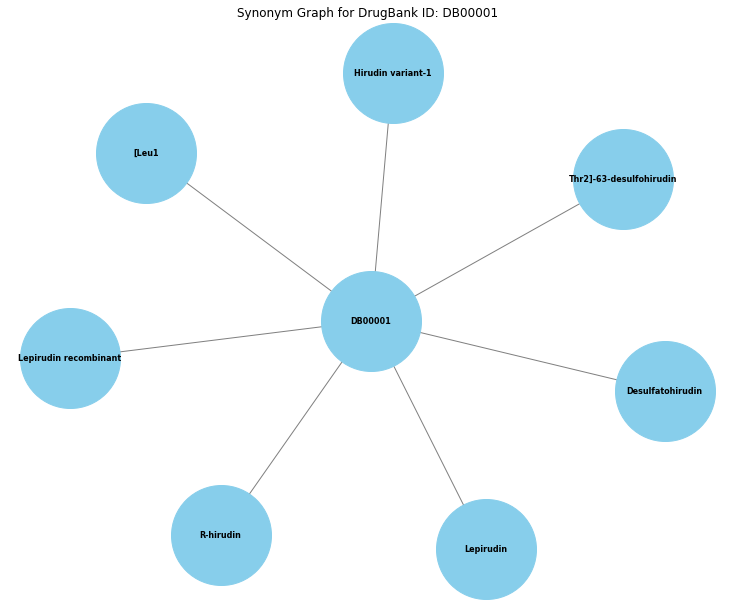

,DrugBank ID,Product Name,Manufacturer,National Drug Code,Dosage Form,Route,Strength,Country,Regulatory Agency
0,DB00001,Refludan,Bayer,50419-150,Powder,Intravenous,50 mg/1mL,US,FDA NDC
1,DB00001,Refludan,Bayer,None,"Powder, for solution",Intravenous,50 mg / vial,Canada,DPD
2,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
3,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,50 mg,EU,EMA
4,DB00001,Refludan,Celgene Europe Limited,None,"Injection, solution, concentrate",Intravenous,20 mg,EU,EMA
...,...,...,...,...,...,...,...,...,...
8242,DB00207,Reopro,Janssen Pharmaceuticals,None,Solution,Intravenous,2 mg / mL,Canada,DPD
8243,DB00208,Infergen,Kadmon Pharmaceuticals,66435-202,Injection,Subcutaneous,0.03 mg/1mL,US,FDA NDC
8244,DB00208,Infergen,Kadmon Pharmaceuticals,66435-201,Injection,Subcutaneous,0.03 mg/1mL,US,FDA NDC
8245,DB00208,Infergen,"Valeant Pharmaceuticals, Inc.",0187-2007,Injection,Subcutaneous,0.03 mg/1mL,US,FDA NDC


,DrugBank ID,Pathway Name
0,DB00001,Lepirudin Action Pathway
1,DB00002,Cetuximab Action Pathway
2,DB00006,Bivalirudin Action Pathway
3,DB00009,Alteplase Action Pathway
4,DB00013,Urokinase Action Pathway
5,DB00015,Reteplase Action Pathway
6,DB00029,Anistreplase Action Pathway
7,DB00031,Tenecteplase Action Pathway
8,DB00054,Abciximab Action Pathway
9,DB00063,Eptifibatide Action Pathway


Total number of all pathways: 25


,Pathway Name,DrugBank ID
0,Abciximab Action Pathway,"DB00054, DB00154"
1,Alteplase Action Pathway,"DB00009, DB00130"
2,Anistreplase Action Pathway,DB00029
3,Bivalirudin Action Pathway,DB00006
4,Cetuximab Action Pathway,DB00002
5,Eptifibatide Action Pathway,"DB00063, DB00157, DB00182"
6,Lepirudin Action Pathway,"DB00001, DB00181"
7,Reteplase Action Pathway,"DB00015, DB00137, DB00191"
8,Streptokinase Action Pathway,"DB00086, DB00151"
9,Tenecteplase Action Pathway,"DB00031, DB00203, DB00207"


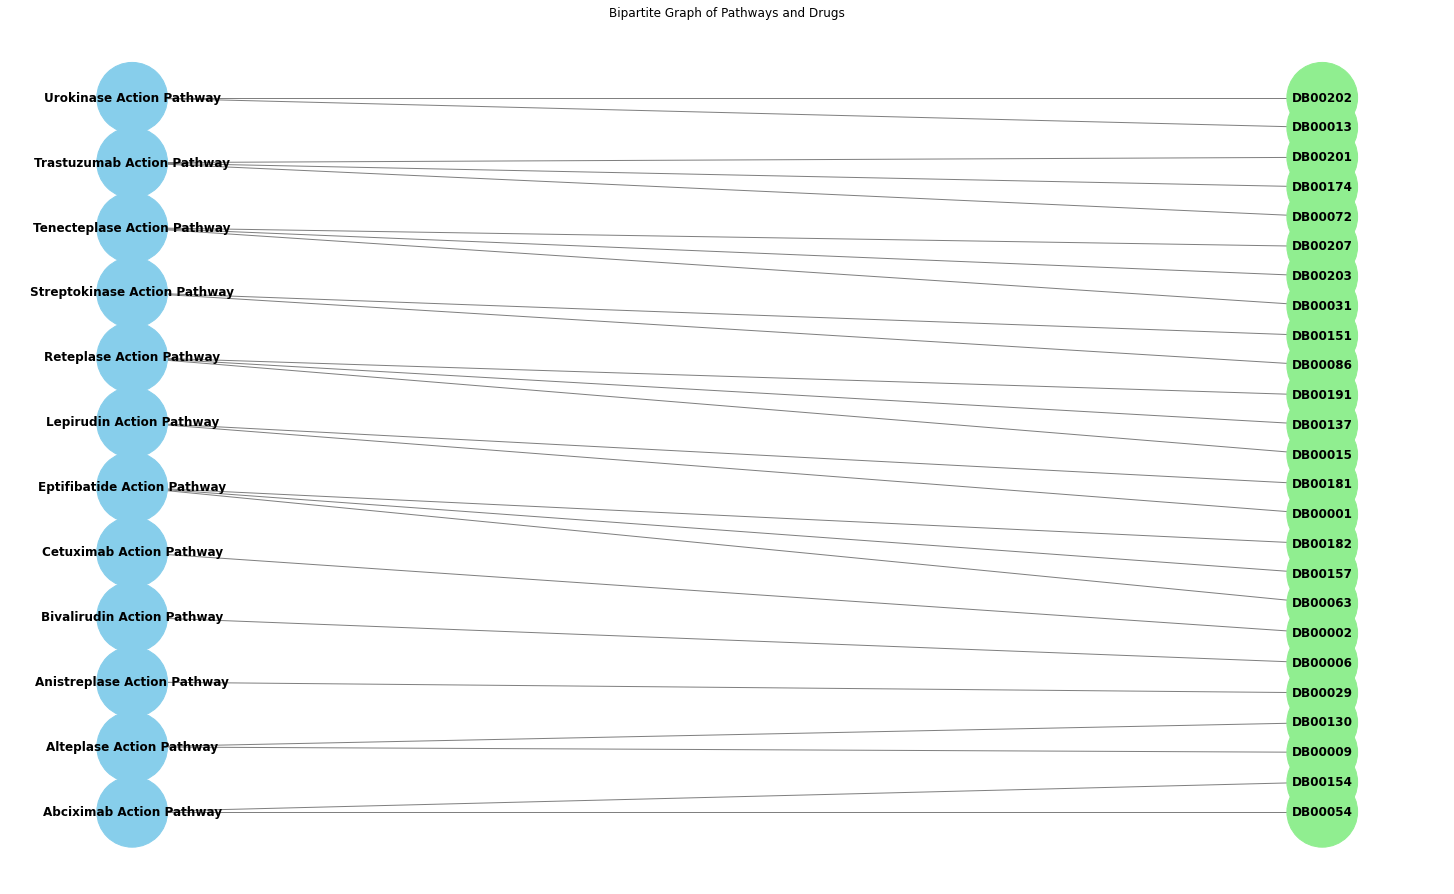

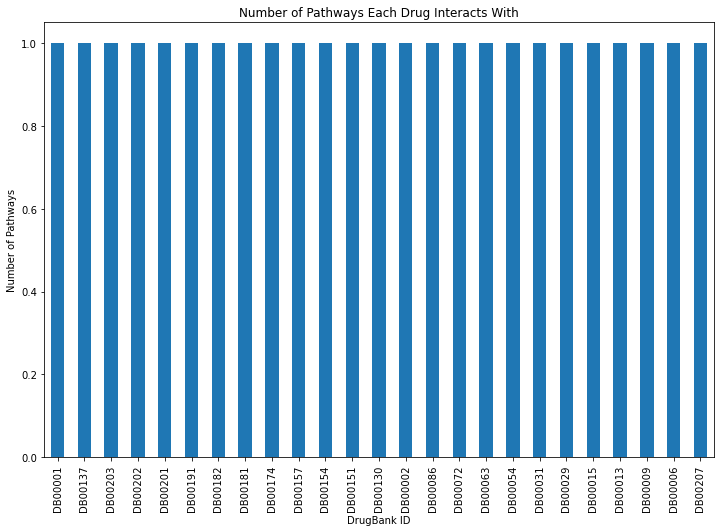

,DrugBank ID,Target ID,Source,External ID,Polypeptide Name,Gene Name,GenAtlas ID,Chromosome,Cellular Location
0,DB00001,BE0000048,Swiss-Prot,P00734,Prothrombin,F2,F2,11,Secreted
1,DB00002,BE0000767,Swiss-Prot,P00533,Epidermal growth factor receptor,EGFR,EGFR,7,Cell membrane
2,DB00002,BE0000901,Swiss-Prot,O75015,Low affinity immunoglobulin gamma Fc region re...,FCGR3B,FCGR3B,1,Cell membrane
3,DB00002,BE0002094,Swiss-Prot,P02745,Complement C1q subcomponent subunit A,C1QA,C1QA,1,Secreted
4,DB00002,BE0002095,Swiss-Prot,P02746,Complement C1q subcomponent subunit B,C1QB,C1QB,1,Secreted
...,...,...,...,...,...,...,...,...,...
475,DB00207,BE0000211,Swiss-Prot,P00747,Plasminogen,PLG,PLG,6,Secreted
476,DB00207,BE0000538,Swiss-Prot,P02671,Fibrinogen alpha chain,FGA,FGA,4,Secreted
477,DB00207,BE0000240,Swiss-Prot,P05121,Plasminogen activator inhibitor 1,SERPINE1,SERPINE1,7,Secreted
478,DB00208,BE0000661,Swiss-Prot,P17181,Interferon alpha/beta receptor 1,IFNAR1,IFNAR1,21,Membrane


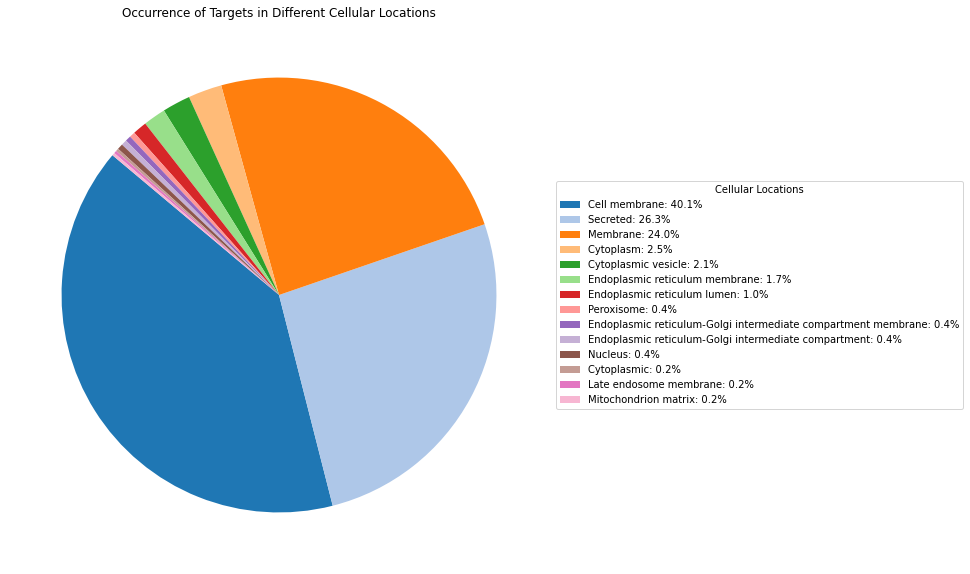

,Status,Count
0,approved,196
1,withdrawn,19
2,experimental/investigational,117
3,vet_approved,10


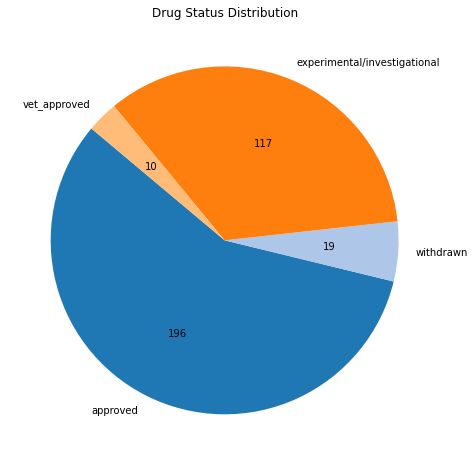

Number of approved drugs that are not withdrawn: 178


Enter DrugBank ID (default is 'DB00001'):  


,DrugBank ID,Interacting Drug ID,Description
0,DB00001,DB06605,Apixaban may increase the anticoagulant activi...
1,DB00001,DB06695,Dabigatran etexilate may increase the anticoag...
2,DB00001,DB01254,The risk or severity of bleeding and hemorrhag...
3,DB00001,DB01609,The risk or severity of gastrointestinal bleed...
4,DB00001,DB01586,The risk or severity of bleeding and bruising ...
...,...,...,...
647,DB00001,DB09422,The therapeutic efficacy of Lepirudin can be d...
648,DB00001,DB09567,The therapeutic efficacy of Lepirudin can be d...
649,DB00001,DB15434,The risk or severity of bleeding can be increa...
650,DB00001,DB17472,The risk or severity of bleeding can be increa...


Enter Gene Name (default is 'F2'):  


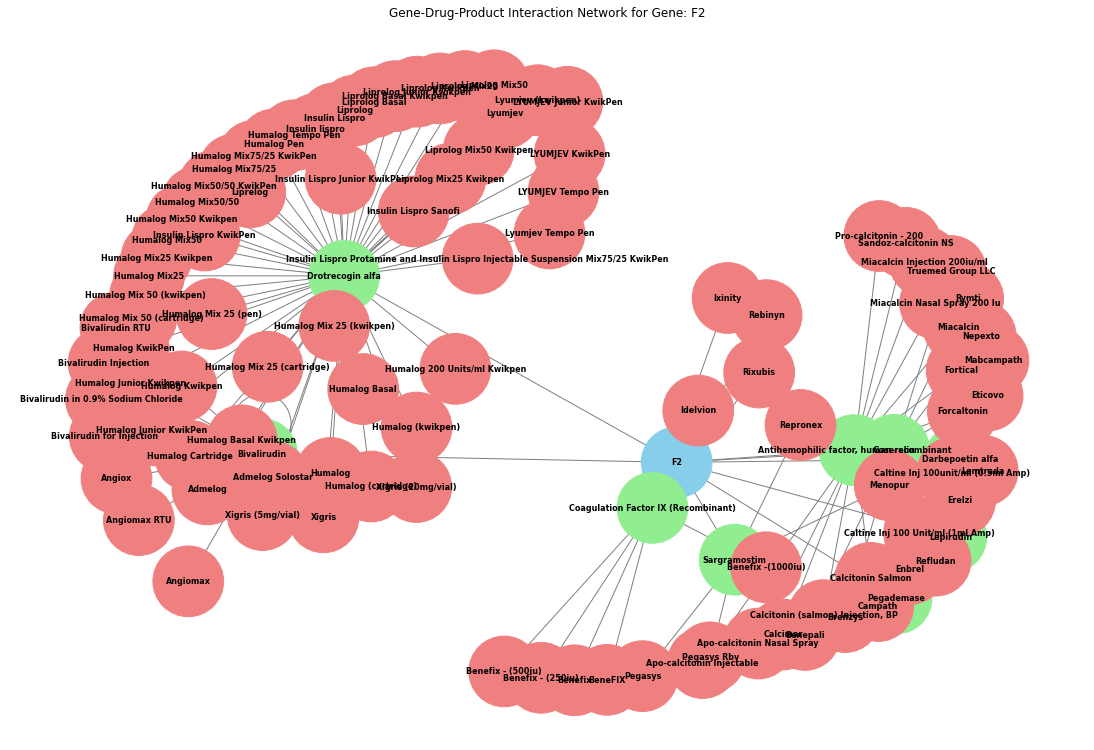

,Gene Names,Organism,Length
0,MCFD2 SDNSF,Homo sapiens (Human),146
1,MCFD2,Pongo abelii (Sumatran orangutan) (Pongo pygma...,146
2,MCFD2,Homo sapiens (Human),109
3,MCFD2,Homo sapiens (Human),90
4,MCFD2,Homo sapiens (Human),61
...,...,...,...
2555,CALR,Anolis carolinensis (Green anole) (American ch...,421
2556,CALR,Nomascus leucogenys (Northern white-cheeked gi...,417
2557,CALR,Cavia porcellus (Guinea pig),417
2558,CALR,Ursus maritimus (Polar bear) (Thalarctos marit...,417


In [20]:
import xmltodict
import random
import copy

def generate_test_database(xml_file, output_file, num_drugs=200):
    # Load the existing 100 drugs
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    existing_drugs = data_dict['drugbank']['drug']
    num_existing_drugs = len(existing_drugs)

    # Extract possible values for each attribute
    names = [drug['name'] for drug in existing_drugs]
    types = [drug['@type'] for drug in existing_drugs]
    descriptions = [drug.get('description', '') for drug in existing_drugs]
    states = [drug.get('state', '') for drug in existing_drugs]
    indications = [drug.get('indication', '') for drug in existing_drugs]
    mechanisms = [drug.get('mechanism-of-action', '') for drug in existing_drugs]
    food_interactions = [drug.get('food-interactions', '') for drug in existing_drugs]
    synonyms = [drug.get('synonyms', {}).get('synonym', []) for drug in existing_drugs]
    products = [drug.get('products', {}).get('product', []) if drug.get('products') else [] for drug in existing_drugs]
    pathways = [drug.get('pathways', {}).get('pathway', []) if drug.get('pathways') else [] for drug in existing_drugs]
    targets = [drug.get('targets', {}).get('target', []) if drug.get('targets') else [] for drug in existing_drugs]
    groups = [drug.get('groups', {}).get('group', []) if drug.get('groups') else [] for drug in existing_drugs]
    interactions = [drug.get('drug-interactions', {}).get('drug-interaction', []) if drug.get('drug-interactions') else [] for drug in existing_drugs]

    # Determine the starting index for new drug IDs
    last_drug_id = existing_drugs[-1]['drugbank-id'][0]['#text']
    start_index = int(last_drug_id[2:]) + 1

    # Generate additional drugs
    new_drugs = copy.deepcopy(existing_drugs)
    for i in range(num_existing_drugs, num_drugs):
        new_drug = copy.deepcopy(random.choice(existing_drugs))
        new_drug['drugbank-id'][0]['#text'] = f'DB{start_index + i - num_existing_drugs:05d}'
        new_drug['name'] = random.choice(names)
        new_drug['@type'] = random.choice(types)
        new_drug['description'] = random.choice(descriptions)
        new_drug['state'] = random.choice(states)
        new_drug['indication'] = random.choice(indications)
        new_drug['mechanism-of-action'] = random.choice(mechanisms)
        new_drug['food-interactions'] = random.choice(food_interactions)
        new_drug['synonyms'] = {'synonym': random.choice(synonyms)}
        new_drug['products'] = {'product': random.choice(products)}
        new_drug['pathways'] = {'pathway': random.choice(pathways)}
        new_drug['targets'] = {'target': random.choice(targets)}
        new_drug['groups'] = {'group': random.choice(groups)}
        new_drug['drug-interactions'] = {'drug-interaction': random.choice(interactions)}
        new_drugs.append(new_drug)

    # Update the data dictionary with the new drugs
    data_dict['drugbank']['drug'] = new_drugs

    # Save the combined data to a new XML file
    with open(output_file, 'w') as file:
        file.write(xmltodict.unparse(data_dict, pretty=True))

# Generate the test database
generate_test_database('drugbank_partial.xml', 'drugbank_partial_and_generated.xml')
print("Base generated successfully!")

# Now invoke the functions task_1 to task_12 on the new database
task_1('drugbank_partial_and_generated.xml')
task_2('drugbank_partial_and_generated.xml')
task_3('drugbank_partial_and_generated.xml')
task_4('drugbank_partial_and_generated.xml')
task_5('drugbank_partial_and_generated.xml')
task_6('drugbank_partial_and_generated.xml')
task_7('drugbank_partial_and_generated.xml')
task_8('drugbank_partial_and_generated.xml')
task_9('drugbank_partial_and_generated.xml')
task_10('drugbank_partial_and_generated.xml')
task_11('drugbank_partial_and_generated.xml')
task_12('drugbank_partial_and_generated.xml')

# Zadanie 14
Tworzymy testy jednostkowe sprawdzające poprawność naszych funkcji z poprzednich zadań. Tworzymy bazę złożoną z dwóch leków

In [6]:
import xmltodict
import pandas
import pytest

def create_small_xml(input_file, output_file):
    # Read and parse the input XML file
    with open(input_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)

    # Extract the first two drugs
    drug_data = {
        'drugbank': {
            'drug': data_dict['drugbank']['drug'][:2]
        }
    }

    # Convert the extracted data back to XML
    xml_content = xmltodict.unparse(drug_data, pretty=True)

    # Write the new XML content to the output file
    with open(output_file, 'w') as file:
        file.write(xml_content)

# Usage
create_small_xml('drugbank_partial.xml', 'testing.xml')

df = task_1('testing.xml')

# Use assert statements to check the DataFrame
assert len(df) == 2, f"Expected DataFrame length 2, but got {len(df)}"
assert 'DrugBank ID' in df.columns, "Expected column 'DrugBank ID' not found"
assert 'Drug Name' in df.columns, "Expected column 'Drug Name' not found"
assert 'Type' in df.columns, "Expected column 'Type' not found"
assert 'Description' in df.columns, "Expected column 'Description' not found"
assert 'State' in df.columns, "Expected column 'State' not found"
assert 'Indication' in df.columns, "Expected column 'Indication' not found"
assert 'Mechanism of Action' in df.columns, "Expected column 'Mechanism of Action' not found"
assert 'Food Interactions' in df.columns, "Expected column 'Food Interactions' not found"

print("All assertions passed.")

df = task_3('testing.xml')

# Use assert statements to check the DataFrame
assert len(df) > 0, f"Expected non-empty DataFrame, but got {len(df)}"
assert 'DrugBank ID' in df.columns, "Expected column 'DrugBank ID' not found"
assert 'Product Name' in df.columns, "Expected column 'Product Name' not found"
assert 'Manufacturer' in df.columns, "Expected column 'Manufacturer' not found"
assert 'National Drug Code' in df.columns, "Expected column 'National Drug Code' not found"
assert 'Dosage Form' in df.columns, "Expected column 'Dosage Form' not found"
assert 'Route' in df.columns, "Expected column 'Route' not found"
assert 'Strength' in df.columns, "Expected column 'Strength' not found"
assert 'Country' in df.columns, "Expected column 'Country' not found"
assert 'Regulatory Agency' in df.columns, "Expected column 'Regulatory Agency' not found"

print("All assertions passed.")

All assertions passed.
All assertions passed.


# Zadanie 15
Realizujemy zadanie 6, aby możliwe było wysłanie id leku na serwer, który zwróci wynik jako odpowiedź.

In [ ]:
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
import xmltodict
import requests
import nest_asyncio
import asyncio
from threading import Thread

# Initialize nest_asyncio to allow the event loop to run inside Jupyter
nest_asyncio.apply()

# Define the FastAPI app
app = FastAPI()

class DrugRequest(BaseModel):
    drug_id: str

def load_data(xml_file):
    with open(xml_file, 'r') as file:
        xml_content = file.read()
        data_dict = xmltodict.parse(xml_content)
    return data_dict

data_dict = load_data('drugbank_partial.xml')

@app.post("/get_pathway_count")
async def get_pathway_count(request: DrugRequest):
    drug_id = request.drug_id
    pathway_count = 0
    for drug in data_dict['drugbank']['drug']:
        if drug['drugbank-id'][0]['#text'] == drug_id:
            if 'pathways' in drug and drug['pathways'] is not None:
                pathways = drug['pathways']['pathway']
                if not isinstance(pathways, list):
                    pathways = [pathways]
                pathway_count = len(pathways)
                break
    if pathway_count == 0:
        return {"error": "Drug not found or no pathways available"}
    return {"drug_id": drug_id, "pathway_count": pathway_count}

# Function to run the FastAPI server
def run_server():
    config = uvicorn.Config(app, host="127.0.0.1", port=8001)
    server = uvicorn.Server(config)
    server.run()

# Run the server in a separate thread
server_thread = Thread(target=run_server, daemon=True)
server_thread.start()

# Allow some time for the server to start
await asyncio.sleep(1)

# Prompt the user for the drug_id with a default value of 'DB00001'
drug_id = input("Enter the drug_id (default is 'DB00001'): ") or 'DB00001'

# Define the URL of the FastAPI endpoint
url = "http://127.0.0.1:8001/get_pathway_count"

# Define the payload with the drug_id
payload = {
    "drug_id": drug_id
}

# Send the POST request
response = requests.post(url, json=payload)

# Print the response
print(response.json())

# Stop the server
uvicorn.Server.should_exit = True

# Wait for the server thread to finish
server_thread.join()

INFO:     Started server process [9033]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


Enter the drug_id (default is 'DB00001'):  


INFO:     127.0.0.1:46008 - "POST /get_pathway_count HTTP/1.1" 200 OK
{'drug_id': 'DB00001', 'pathway_count': 1}
